In [2]:
import numpy as np
import nibabel as nb
import pandas as pd
import scipy.io
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
left_movie_data = scipy.io.loadmat('D:/FPP_project_analysis/Movie_watching_avg_data/notmean_left_Meanfile.mat')['Left_data']
right_movie_data = scipy.io.loadmat('D:/FPP_project_analysis/Movie_watching_avg_data/notmean_right_Meanfile.mat')['Right_data']

In [4]:
Run1Seconds = np.array([i for i in range(819, 900+1)])
Run2Seconds = np.array([i for i in range(1737, 1818+1)])
Run3Seconds = np.array([i for i in range(2652, 2733+1)])
Run4Seconds = np.array([i for i in range(3553, 3634+1)])

In [5]:
Run1Seconds.shape

(82,)

In [6]:
RunSeconds = np.array([Run1Seconds, Run2Seconds, Run3Seconds, Run4Seconds])

In [7]:
file_path = 'D:/FPP_project_analysis/4_Memory_analysis/GPTLabelingFinalize.csv'

RelabelDataframe = pd.read_csv(file_path)

In [8]:
RelabelDictionary = {}
for index, row in RelabelDataframe.iterrows():
    if index != 0:
        RelabelDictionary[row['prv_label']] = row['new_label']
RelabelDictionary[''] = float('nan')

In [9]:
RelabelDictionary

{'abdomen': 'Body',
 'airliner': 'Object',
 'airplane': 'Object',
 'animal': 'Animal',
 'animation': 'Object',
 'apparel': 'Object',
 'appliance': 'Object',
 'arch': 'Place',
 'arise': 'Unclear',
 'arm': 'Body',
 'armament': 'Object',
 'armchair': 'Object',
 'ascend': 'Unclear',
 'ashcan': 'Object',
 'automaton': 'Object',
 'automobile_horn': 'Object',
 'awning': 'Object',
 'ax': 'Object',
 'baby': 'Body',
 'back': 'Body',
 'back_up': 'Unclear',
 'backhoe': 'Object',
 'backpack': 'Object',
 'bag': 'Object',
 'balcony': 'Place',
 'ball': 'Object',
 'bamboo': 'Object',
 'band': 'Body',
 'barber': 'Body',
 'barbershop': 'Place',
 'barrel': 'Object',
 'barroom': 'Place',
 'base': 'Place',
 'baseball': 'Unclear',
 'baseball_bat': 'Object',
 'basement': 'Place',
 'basket': 'Object',
 'bathroom': 'Place',
 'beach': 'Place',
 'beacon': 'Place',
 'beam': 'Object',
 'beard': 'Face',
 'bed': 'Object',
 'bedroom': 'Place',
 'bee': 'Animal',
 'beer': 'Object',
 'beet': 'Object',
 'bench': 'Object',

In [10]:
labels_list_1 = []
with open("D:/FPP_project_analysis/4_Memory_analysis/Movie1_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_1.append(labels)
labels_list_2 = []
with open("D:/FPP_project_analysis/4_Memory_analysis/Movie2_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_2.append(labels)
labels_list_3 = []
with open("D:/FPP_project_analysis/4_Memory_analysis/Movie3_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_3.append(labels)
labels_list_4 = []
with open("D:/FPP_project_analysis/4_Memory_analysis/Movie4_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_4.append(labels)
labels_list = labels_list_1 + labels_list_2 + labels_list_3  + labels_list_4
print(len(labels_list))

3655


In [11]:
RelabeldFrames = [set() for i in range(3655)]
for i in range(3655):
    for j in labels_list[i]:
        RelabeldFrames[i].add(str(RelabelDictionary[j]))

In [12]:
RunsWithoutFB = np.empty(4, dtype=object)
for i in range(4):
    RunsWithoutFB[i] = []
for i in range(4):
    for j in RunSeconds[i]:
        if ('Face' not in RelabeldFrames[j]) and ('Body' not in RelabeldFrames[j]):
            RunsWithoutFB[i].append(j)

In [13]:
PreferedSeconds = np.array([np.array(RunsWithoutFB[i]) for i in range(4)])

In [14]:
PreferedSeconds.shape

(4, 29)

In [15]:
ShiftedPreferedSeconds = (PreferedSeconds + 4)%3655

In [16]:
FPPs_right = (nb.load('D:/FPP_project_analysis/1_Finding_ROIs/sub_2/FPPs.rh.func.gii').darrays[0].data).T
FPPs_left = (nb.load('D:/FPP_project_analysis/1_Finding_ROIs/sub_2/FPPs.lh.func.gii').darrays[0].data).T

In [17]:
Right_FPPs_indices = [np.nonzero(FPPs_right[i]) for i in range(5)]
Left_FPPs_indices = [np.nonzero(FPPs_left[i]) for i in range(5)]

In [18]:
Activity_of_FPPs = [np.concatenate((right_movie_data[Right_FPPs_indices[i]], left_movie_data[Left_FPPs_indices[i]])) for i in range(5)]

In [19]:
Mean_FPPs_Activity = np.array([np.mean(Activity_of_FPPs[i], axis=0) for i in range(5)])

In [21]:
right_movie_data[Right_FPPs_indices[0]][:,ShiftedPreferedSeconds[0]].shape

(89, 29)

In [25]:
Mean_activity_each_FPP_in_each_run = np.zeros((5,4))
SEM_each_FPP_in_each_run = np.zeros((5,4))

for FPP in range(5):
    for run in range(4):
        Activity_each_vertices_in_each_run = np.concatenate((right_movie_data[Right_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[run]], left_movie_data[Left_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[run]]))
        Mean_activity_FPP_in_each_second_of_run = np.mean(Activity_each_vertices_in_each_run, axis=0)
        Mean_activity_FPP_in_each_run = np.mean(Mean_activity_FPP_in_each_second_of_run)
        Mean_activity_each_FPP_in_each_run[FPP, run] = Mean_activity_FPP_in_each_run
        SEM_each_FPP_in_each_run[FPP,run] = stats.sem(Mean_activity_FPP_in_each_second_of_run)

In [26]:
Mean_activity_each_FPP_in_each_run

array([[0.06903589, 0.07114626, 0.01832419, 0.05866088],
       [0.10691905, 0.1839698 , 0.12314774, 0.14454909],
       [0.10795955, 0.26737724, 0.21559423, 0.26795417],
       [0.08465093, 0.28059275, 0.24270357, 0.31258815],
       [0.13732913, 0.31127071, 0.24218545, 0.27772396]])

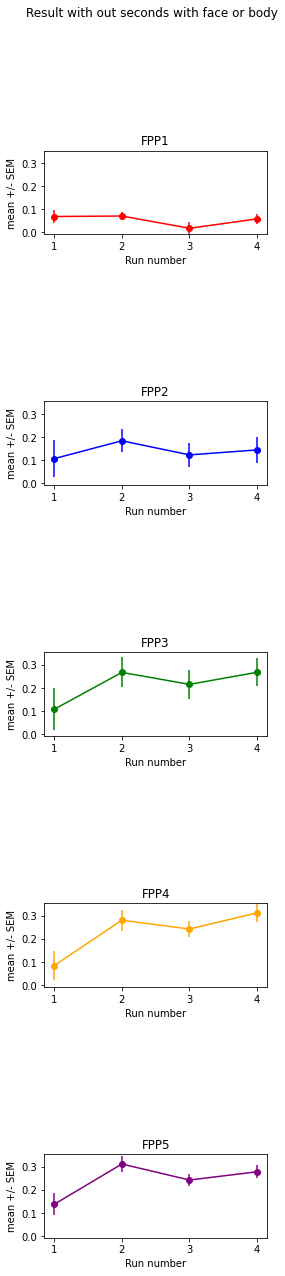

In [48]:
x = [1, 2, 3, 4]

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axs = plt.subplots(5, 1, figsize=(4, 20))
max_vals = []
min_vals = []
for i in range(5):
    max_vals.append(max(Mean_activity_each_FPP_in_each_run[i] + SEM_each_FPP_in_each_run[i]))
    min_vals.append(min(Mean_activity_each_FPP_in_each_run[i] - SEM_each_FPP_in_each_run[i]))

y_min = min(min_vals)
y_max = max(max_vals)
for i in range(5):
    axs[i].set_ylim(y_min, y_max)

# for i in range(5):
#     axs[i].set_yticks(np.arange(y_min, y_max+0.1,0.1))
    
for i in range(5):
    axs[i].errorbar(x, Mean_activity_each_FPP_in_each_run[i], yerr=SEM_each_FPP_in_each_run[i], fmt='-o', color=colors[i])
    axs[i].set_title(f'FPP{i+1}')
    axs[i].set_xticks(x)
    axs[i].set_xlabel('Run number')
    axs[i].set_ylabel('mean +/- SEM')
    axs[i].set_yticks([0,0.1,0.2,0.3])

plt.subplots_adjust(hspace=2)

plt.suptitle('Result with out seconds with face or body')
plt.show()

In [43]:
a = np.load('D:/place_ROIs_project/TransitionFrames.npy')

In [44]:
a.shape

(1019,)